In [212]:
# 경고창 무시
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc('font', size=15)
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import pandas as pd
df = pd.read_csv("여자배구_경기별_수치_득실점수정.csv")
시즌팀 = pd.read_csv('시즌별_팀데이터.csv', encoding='utf8')
df = df.drop(columns='Unnamed: 0')

df

,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,...,블로킹_어시스트,벌칙_벌칙,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점
0,1,2017-10-14,IBK기업은행,1,0,89,69,179,51,15,...,8,0,25,3,0.86,0.27,0.40,0.12,96,108
1,1,2017-10-14,흥국생명,0,1,127,83,193,63,11,...,10,0,27,1,0.86,0.31,0.51,0.21,108,96
2,2,2017-10-15,KGC인삼공사,1,0,94,79,205,67,20,...,5,0,14,4,0.81,0.30,0.48,0.09,108,116
3,2,2017-10-15,현대건설,0,1,102,102,198,77,7,...,17,0,29,5,0.89,0.36,0.45,0.19,116,108
4,3,2017-10-17,GS칼텍스,0,1,138,88,175,72,9,...,6,0,25,0,0.84,0.38,0.44,0.10,110,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,472,2022-02-26,흥국생명,0,0,111,38,108,32,8,...,3,0,15,1,0.81,0.27,0.25,0.06,53,75
944,473,2022-02-27,페퍼저축은행,0,0,116,44,123,36,10,...,3,0,12,6,0.84,0.27,0.37,0.09,55,75
945,473,2022-02-27,한국도로공사,1,1,124,63,109,49,4,...,9,0,11,2,0.90,0.43,0.59,0.14,75,55
946,474,2022-02-28,GS칼텍스,1,1,164,67,91,52,8,...,8,0,7,0,0.82,0.52,0.48,0.17,78,52


In [2]:
# 여자배구_총점수용 = pd.read_csv('여자배구_세트당_경기시간.csv',encoding='utf8')
# df['총_점수'] = 여자배구_총점수용['TOTAL']
# home_index = df[df['Unnamed: 0']/2+1==df['경기번호']].index
# away_index = df[df['Unnamed: 0']/2+1!=df['경기번호']].index
# df['실점'] = np.nan

# df.loc[home_index,'실점']=df.loc[away_index, "총_점수"].values
# df.loc[away_index,'실점']=df.loc[home_index, "총_점수"].values
# df = df.astype({'실점':"int64"})

In [3]:
# df = df.drop(columns='Unnamed: 0')

In [4]:
# df.to_csv('여자배구_경기별_수치_득실점수정.csv')

In [213]:
# 상대팀 컬럼 추가
df=df.reset_index()
home_index = df[df['index']/2+1==df['경기번호']].index
away_index = df[df['index']/2+1!=df['경기번호']].index
df['상대팀'] = df['팀명']
df.loc[home_index,'상대팀']=df.loc[away_index,'팀명'].values
df.loc[away_index,'상대팀']=df.loc[home_index,'팀명'].values
df

,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,벌칙_벌칙,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀
0,0,1,2017-10-14,IBK기업은행,1,0,89,69,179,51,...,0,25,3,0.86,0.27,0.40,0.12,96,108,흥국생명
1,1,1,2017-10-14,흥국생명,0,1,127,83,193,63,...,0,27,1,0.86,0.31,0.51,0.21,108,96,IBK기업은행
2,2,2,2017-10-15,KGC인삼공사,1,0,94,79,205,67,...,0,14,4,0.81,0.30,0.48,0.09,108,116,현대건설
3,3,2,2017-10-15,현대건설,0,1,102,102,198,77,...,0,29,5,0.89,0.36,0.45,0.19,116,108,KGC인삼공사
4,4,3,2017-10-17,GS칼텍스,0,1,138,88,175,72,...,0,25,0,0.84,0.38,0.44,0.10,110,107,한국도로공사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,943,472,2022-02-26,흥국생명,0,0,111,38,108,32,...,0,15,1,0.81,0.27,0.25,0.06,53,75,IBK기업은행
944,944,473,2022-02-27,페퍼저축은행,0,0,116,44,123,36,...,0,12,6,0.84,0.27,0.37,0.09,55,75,한국도로공사
945,945,473,2022-02-27,한국도로공사,1,1,124,63,109,49,...,0,11,2,0.90,0.43,0.59,0.14,75,55,페퍼저축은행
946,946,474,2022-02-28,GS칼텍스,1,1,164,67,91,52,...,0,7,0,0.82,0.52,0.48,0.17,78,52,KGC인삼공사


In [214]:
# 시즌별 경기 나누기

df17 = df.loc[df['경기날짜'].between('2017-10-01', '2018-04-30')]
df18 = df.loc[df['경기날짜'].between('2018-10-01', '2019-04-30')]
df19 = df.loc[df['경기날짜'].between('2019-10-01', '2020-04-30')]
df20 = df.loc[df['경기날짜'].between('2020-10-01', '2021-05-30')]
df21 = df.loc[df['경기날짜'].between('2021-10-01', '2022-03-30')]

df17['시즌'] = '17-18'
df18['시즌'] = '18-19'
df19['시즌'] = '19-20'
df20['시즌'] = '20-21'
df21['시즌'] = '21-22'

df = pd.concat([df17, df18, df19, df20, df21])
df

,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌
0,0,1,2017-10-14,IBK기업은행,1,0,89,69,179,51,...,25,3,0.86,0.27,0.40,0.12,96,108,흥국생명,17-18
1,1,1,2017-10-14,흥국생명,0,1,127,83,193,63,...,27,1,0.86,0.31,0.51,0.21,108,96,IBK기업은행,17-18
2,2,2,2017-10-15,KGC인삼공사,1,0,94,79,205,67,...,14,4,0.81,0.30,0.48,0.09,108,116,현대건설,17-18
3,3,2,2017-10-15,현대건설,0,1,102,102,198,77,...,29,5,0.89,0.36,0.45,0.19,116,108,KGC인삼공사,17-18
4,4,3,2017-10-17,GS칼텍스,0,1,138,88,175,72,...,25,0,0.84,0.38,0.44,0.10,110,107,한국도로공사,17-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,943,472,2022-02-26,흥국생명,0,0,111,38,108,32,...,15,1,0.81,0.27,0.25,0.06,53,75,IBK기업은행,21-22
944,944,473,2022-02-27,페퍼저축은행,0,0,116,44,123,36,...,12,6,0.84,0.27,0.37,0.09,55,75,한국도로공사,21-22
945,945,473,2022-02-27,한국도로공사,1,1,124,63,109,49,...,11,2,0.90,0.43,0.59,0.14,75,55,페퍼저축은행,21-22
946,946,474,2022-02-28,GS칼텍스,1,1,164,67,91,52,...,7,0,0.82,0.52,0.48,0.17,78,52,KGC인삼공사,21-22


In [215]:
df21['경기날짜']=df21['경기날짜'].astype('datetime64')

In [211]:
date = df21.loc[740, '경기날짜']
for i in range(738,750) :
    date = df21.loc[i, '경기날짜']
    names = df21.loc[i, '팀명']
    
    for name in names :
        display(df21[(df21['경기날짜'] == date) & ((df21.loc[740,'팀명']) == name)])


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,범실_범실,팀코드,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌


In [202]:
def find_previous_record(df, date, name) :
    day1 = pd.Timedelta(days=1)
    date -= day1
    cols = ['디그_성공률','세트_성공률','리시브_정확도','블로킹_성공률','홈_어웨이']
    while date >= df.loc[738, '경기날짜'] :
        row = df[(df['경기날짜'] == date) & ((df.loc[i,'팀명']) == name)]
        if len(row) == 2 : # 이전 기록 존재
            return row[cols]
        date -= day1
    else : # 이전 기록 존재 x
        return []

In [170]:
pd.DataFrame(row[cols],columns=cols)

,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,홈_어웨이
740,0.78,0.30,0.37,0.08,0
741,0.89,0.41,0.39,0.17,1


In [208]:
df21.loc[740, '팀명']

'IBK기업은행'

In [200]:
date = df.loc[30, '경기날짜']
day1 = pd.Timedelta(days=1)
date -= day1
while date >= df.loc[0, '경기날짜'] :
    row = df[(df['경기날짜'] == date) & ((df.loc[10,'팀명']) == 'IBK기업은행')]
    if len(row) == 2 : # 이전 기록 존재
        print(row[cols])
    date -= day1
else : # 이전 기록 존재 x
    print('a')

    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
28    0.82    0.33     0.45     0.13      1
29    0.89    0.34     0.45     0.18      0
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
26    0.88    0.37     0.45     0.16      1
27    0.81    0.28     0.52     0.16      0
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
24    0.81    0.42     0.47     0.18      1
25    0.79    0.35     0.40     0.07      0
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
22    0.93    0.32     0.53     0.18      0
23    0.84    0.27     0.43     0.13      1
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
20    0.85    0.37     0.42     0.06      1
21    0.90    0.41     0.28     0.15      0
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
18    0.83    0.34     0.42     0.19      1
19    0.88    0.32     0.46     0.16      0
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
16    0.84    0.31     0.51     0.18      0
17    0.87    0.40     0.50     0.16      1
    디그_성공률  세트_성공률  리시브_정확도  블로킹_성공률  홈_어웨이
14    0.88    0.46     0.39     

In [175]:
row = df21[(df['경기날짜'] == '2021-10-17') & ((df21.loc[740,'팀명']) == 'IBK기업은행')]

row[cols]
row1 = pd.DataFrame(index=list(range(739,740)), columns=cols)
row1 = pd.concat([row1,row[cols]])
row1 

1

In [163]:
cols = ['디그_성공률','세트_성공률','리시브_정확도','블로킹_성공률','홈_어웨이']

In [205]:
rows = []
row = pd.DataFrame(index=list(range(739,740)),columns=cols)
for i in range(738,750) :
    date = df21.loc[i, '경기날짜']
    names = df21.loc[i, '팀명']
    
    for name in names :
        result = find_previous_record(df21, date, name)
        if len(result) == 0 :
            pass
        else :
            row = pd.concat([row,result[cols]])
row

,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,홈_어웨이
739,NaN,NaN,NaN,NaN,NaN


In [106]:
pd.DataFrame(rows).isnull().sum()

0     1170
1     1170
2     1170
3     1170
4     1170
5     1170
6     1170
7     1170
8     1170
9     1170
10    1170
11    1170
12    1170
13    1170
14    1170
15    1170
16    1170
17    1170
18    1170
19    1170
20    1170
21    1170
22    1170
23    1170
24    1170
25    1170
26    1170
27    1170
28    1170
29    1170
30    1170
31    1170
32    1170
33    1170
34    1170
dtype: int64

In [216]:
팀 = df['팀명'].unique()
팀

array(['IBK기업은행', '흥국생명', 'KGC인삼공사', '현대건설', 'GS칼텍스', '한국도로공사', '페퍼저축은행'],
      dtype=object)

# 홈-어웨이에 따른 경기결과 분석

In [217]:
# 홈어웨이_전적 dataframe 생성
홈어웨이_전적 = pd.DataFrame(index=["원정승","원정패","홈승","홈패"],columns=팀) 
홈어웨이_전적.fillna(0,inplace=True)
홈어웨이_전적_비율 = pd.DataFrame(index=["원정승","원정패","홈승","홈패"],columns=팀) 
홈어웨이_전적_비율.fillna(0,inplace=True)
홈어웨이_전적

,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사,페퍼저축은행
원정승,0,0,0,0,0,0,0
원정패,0,0,0,0,0,0,0
홈승,0,0,0,0,0,0,0
홈패,0,0,0,0,0,0,0


In [218]:
# 원정승/패. 홈승/패 계산
for i in 팀:
    cond = (df['팀명']==i) & (df['홈_어웨이'] == 0)
    홈어웨이_전적[i]['원정승'] = df.loc[cond, '결과'].sum()
    홈어웨이_전적[i]['원정패'] = df.loc[cond, '결과'].count() - 홈어웨이_전적[i]['원정승']
    cond = (df['팀명']==i) & (df['홈_어웨이'] == 1)
    홈어웨이_전적[i]['홈승'] = df.loc[cond, '결과'].sum()
    홈어웨이_전적[i]['홈패'] = df.loc[cond, '결과'].count() - 홈어웨이_전적[i]['홈승']
    
홈어웨이_전적

,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사,페퍼저축은행
원정승,31,36,25,33,44,45,1
원정패,46,43,46,44,35,32,13
홈승,40,44,32,46,46,49,2
홈패,39,34,43,27,28,30,14


In [219]:
# 홈어웨이_전적 비율계산
for i in 팀:
    cal = 홈어웨이_전적[i]['원정승'] + 홈어웨이_전적[i]['원정패']
    홈어웨이_전적_비율[i]['원정승'] = (홈어웨이_전적[i]['원정승']/cal)
    홈어웨이_전적_비율[i]['원정패'] = (홈어웨이_전적[i]['원정패']/cal)
    cal = 홈어웨이_전적[i]['홈승']+홈어웨이_전적[i]['홈패']
    홈어웨이_전적_비율[i]['홈승'] = (홈어웨이_전적[i]['홈승']/cal)
    홈어웨이_전적_비율[i]['홈패'] = (홈어웨이_전적[i]['홈패']/cal)
홈어웨이_전적_비율.T

,원정승,원정패,홈승,홈패
IBK기업은행,0.402597,0.597403,0.506329,0.493671
흥국생명,0.455696,0.544304,0.564103,0.435897
KGC인삼공사,0.352113,0.647887,0.426667,0.573333
현대건설,0.428571,0.571429,0.630137,0.369863
GS칼텍스,0.556962,0.443038,0.621622,0.378378
한국도로공사,0.584416,0.415584,0.620253,0.379747
페퍼저축은행,0.071429,0.928571,0.125000,0.875000


## 홈-어웨이 분석 시각화
- 원정경기에서는 패, 홈경기에서는 승이 유리함

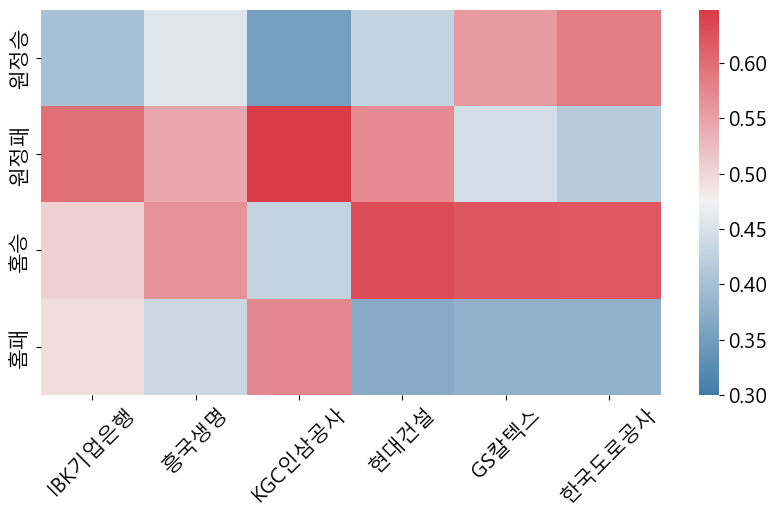

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
data = 홈어웨이_전적_비율.drop(columns='페퍼저축은행')
plt.figure(figsize=(10, 5))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data,cmap=cmap, vmin = 0.3)     # 최소값을 -1로 설정
plt.xticks(rotation=45)
plt.show()

In [221]:
# 데이터 복사본
data = 홈어웨이_전적.copy()
data.drop(columns='페퍼저축은행', inplace=True)
data = data.T.reset_index()

# 거리계산을 위해 정규화 전처리 진행
from sklearn.preprocessing import MinMaxScaler
data[['원정승','원정패','홈승','홈패']] = MinMaxScaler().fit_transform(data[['원정승','원정패','홈승','홈패']])
data

,index,원정승,원정패,홈승,홈패
0,IBK기업은행,0.30,1.000000,0.470588,0.7500
1,흥국생명,0.55,0.785714,0.705882,0.4375
2,KGC인삼공사,0.00,1.000000,0.000000,1.0000
3,현대건설,0.40,0.857143,0.823529,0.0000
4,GS칼텍스,0.95,0.214286,0.823529,0.0625
5,한국도로공사,1.00,0.000000,1.000000,0.1875


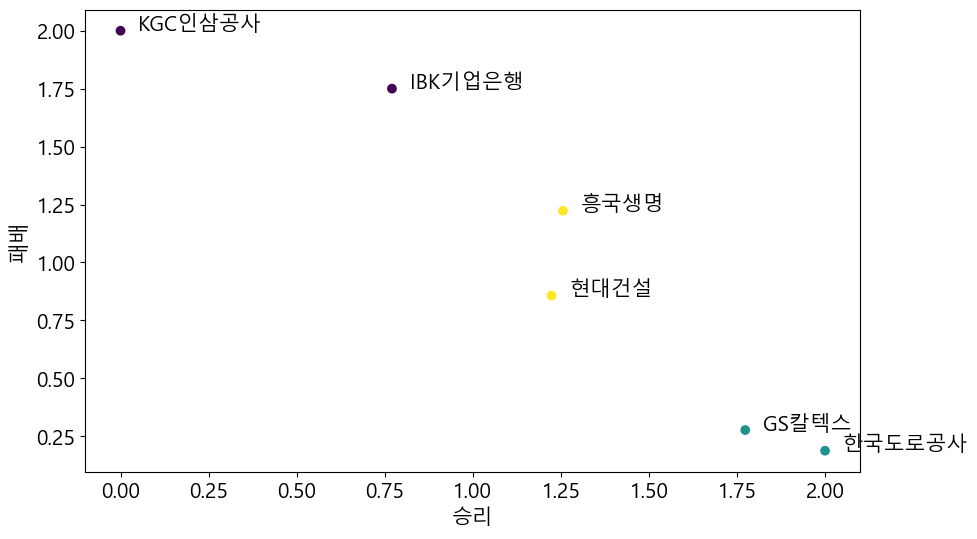

In [222]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

# 군집분석
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
pred = model.fit_predict(data[['원정승','원정패','홈승','홈패']])

plt.scatter( 
    data['원정승']+data['홈승'], 
    data['원정패']+data['홈패'],
    c = pred # color : 같은 값끼리 같은 색을 가짐
) 
plt.xlabel('승리')
plt.ylabel('패배')
#각 데이터에 제품번호 출력
for i,index,원정승,원정패,홈승,홈패 in data.itertuples():
    plt.annotate( f"{index}",(원정승+홈승+0.05, 원정패+홈패))
plt.show()

## 1차학습

In [223]:
# df2에 원정, 홈 승/패 비율 추가

df2 = df.copy()

for i in 팀:
    df2.loc[df2['팀명']==i, '원정승'] = 홈어웨이_전적_비율[i]['원정승']
    df2.loc[df2['팀명']==i, '원정패'] = 홈어웨이_전적_비율[i]['원정패']
    df2.loc[df2['팀명']==i, '홈승'] = 홈어웨이_전적_비율[i]['홈승']
    df2.loc[df2['팀명']==i, '홈패'] = 홈어웨이_전적_비율[i]['홈패']
df2.iloc[:,70:]

,디그_성공률,세트_성공률,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌,원정승,원정패,홈승,홈패
0,0.86,0.27,0.40,0.12,96,108,흥국생명,17-18,0.402597,0.597403,0.506329,0.493671
1,0.86,0.31,0.51,0.21,108,96,IBK기업은행,17-18,0.455696,0.544304,0.564103,0.435897
2,0.81,0.30,0.48,0.09,108,116,현대건설,17-18,0.352113,0.647887,0.426667,0.573333
3,0.89,0.36,0.45,0.19,116,108,KGC인삼공사,17-18,0.428571,0.571429,0.630137,0.369863
4,0.84,0.38,0.44,0.10,110,107,한국도로공사,17-18,0.556962,0.443038,0.621622,0.378378
...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.81,0.27,0.25,0.06,53,75,IBK기업은행,21-22,0.455696,0.544304,0.564103,0.435897
944,0.84,0.27,0.37,0.09,55,75,한국도로공사,21-22,0.071429,0.928571,0.125000,0.875000
945,0.90,0.43,0.59,0.14,75,55,페퍼저축은행,21-22,0.584416,0.415584,0.620253,0.379747
946,0.82,0.52,0.48,0.17,78,52,KGC인삼공사,21-22,0.556962,0.443038,0.621622,0.378378


In [224]:
# X, Y 선택
features = ['디그_성공률','세트_성공률','리시브_정확도','블로킹_성공률','원정승','원정패','홈승','홈패','홈_어웨이']

X = df2[features]
y = df2['결과']

In [225]:
# 학습, 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, 
#     stratify=Y, 
    random_state=0)

In [226]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.77894737, 0.73157895, 0.69473684, 0.74074074, 0.82539683])

In [227]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors':range(1,50)
}
gs = GridSearchCV(model, params).fit(X,y)

In [228]:
gs.best_score_
gs.best_params_

{'n_neighbors': 13}

In [229]:
# KNN 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
knn.score(X_train, Y_train), knn.score(X_test, Y_test)

(0.8481012658227848, 0.7637130801687764)

In [230]:
# LogisticRegression 알고리즘
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, Y_train)
lr.score(X_train, Y_train), lr.score(X_test, Y_test)

(0.7918424753867792, 0.7932489451476793)

In [231]:
# DecisionTree 알고리즘
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)
dtc.score(X_train, Y_train), dtc.score(X_test, Y_test)

(0.8551336146272855, 0.810126582278481)

In [23]:
dtc.get_depth()

5

In [232]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier().fit(X_train,Y_train)
RFC.score(X_train,Y_train), RFC.score(X_test,Y_test)

(1.0, 0.8270042194092827)

In [233]:
from xgboost import XGBClassifier as xgb

Xgb = xgb()
Xgb.fit(X_train,Y_train)
Xgb.score(X_train,Y_train), Xgb.score(X_test,Y_test)

[13:42:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(1.0, 0.8270042194092827)

In [245]:
df2

,index,경기번호,경기날짜,팀명,홈_어웨이,결과,No.,득점_득점,공격종합_시도,공격종합_성공,...,리시브_정확도,블로킹_성공률,총_점수,실점,상대팀,시즌,원정승,원정패,홈승,홈패
0,0,1,2017-10-14,IBK기업은행,1,0,89,69,179,51,...,0.40,0.12,96,108,흥국생명,17-18,0.402597,0.597403,0.506329,0.493671
1,1,1,2017-10-14,흥국생명,0,1,127,83,193,63,...,0.51,0.21,108,96,IBK기업은행,17-18,0.455696,0.544304,0.564103,0.435897
2,2,2,2017-10-15,KGC인삼공사,1,0,94,79,205,67,...,0.48,0.09,108,116,현대건설,17-18,0.352113,0.647887,0.426667,0.573333
3,3,2,2017-10-15,현대건설,0,1,102,102,198,77,...,0.45,0.19,116,108,KGC인삼공사,17-18,0.428571,0.571429,0.630137,0.369863
4,4,3,2017-10-17,GS칼텍스,0,1,138,88,175,72,...,0.44,0.10,110,107,한국도로공사,17-18,0.556962,0.443038,0.621622,0.378378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,943,472,2022-02-26,흥국생명,0,0,111,38,108,32,...,0.25,0.06,53,75,IBK기업은행,21-22,0.455696,0.544304,0.564103,0.435897
944,944,473,2022-02-27,페퍼저축은행,0,0,116,44,123,36,...,0.37,0.09,55,75,한국도로공사,21-22,0.071429,0.928571,0.125000,0.875000
945,945,473,2022-02-27,한국도로공사,1,1,124,63,109,49,...,0.59,0.14,75,55,페퍼저축은행,21-22,0.584416,0.415584,0.620253,0.379747
946,946,474,2022-02-28,GS칼텍스,1,1,164,67,91,52,...,0.48,0.17,78,52,KGC인삼공사,21-22,0.556962,0.443038,0.621622,0.378378


In [234]:
from lightgbm import LGBMClassifier

light = LGBMClassifier(max_depth=7)
light.fit(X_train,Y_train)
light.score(X_train,Y_train),light.score(X_test,Y_test)

(0.9887482419127989, 0.8523206751054853)

In [244]:
light.predict([df2.loc[946,features]])

array([1], dtype=int64)

# 상대전적에 따른 경기결과 분석

In [27]:
상대전적 = pd.DataFrame(index=팀, columns=팀)
상대전적.fillna(0,inplace=True)
상대전적_득점 = pd.DataFrame(index=팀, columns=팀)
상대전적_득점.fillna(0,inplace=True)
상대전적

,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사,페퍼저축은행
IBK기업은행,0,0,0,0,0,0,0
흥국생명,0,0,0,0,0,0,0
KGC인삼공사,0,0,0,0,0,0,0
현대건설,0,0,0,0,0,0,0
GS칼텍스,0,0,0,0,0,0,0
한국도로공사,0,0,0,0,0,0,0
페퍼저축은행,0,0,0,0,0,0,0


In [28]:
# 상대전적 계산 row 팀이 col 팀을 상대로 이긴 횟수
for i in 팀 : 
    df3 = df[df["팀명"]==i][["상대팀","결과"]]
    for j in 팀 :
        상대전적[i][j] = df3[df3["상대팀"]==j]["결과"].sum()
상대전적

,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사,페퍼저축은행
IBK기업은행,0,18,10,17,17,19,2
흥국생명,12,0,9,14,18,25,1
KGC인삼공사,19,19,0,16,20,13,0
현대건설,13,16,13,0,14,16,0
GS칼텍스,13,11,8,13,0,16,0
한국도로공사,11,12,12,14,16,0,0
페퍼저축은행,3,4,5,5,5,5,0


In [29]:
# 상대전적_득점 계산 row 팀이 col 팀을 상대로 득점한 총 점수
for i in 팀 : 
    df3 = df[df["팀명"]==i][["상대팀","득점_득점"]]
    for j in 팀 :
        상대전적_득점[i][j] = df3[df3["상대팀"]==j]["득점_득점"].sum()
상대전적_득점

,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사,페퍼저축은행
IBK기업은행,0,1800,1800,2033,2085,2065,286
흥국생명,1747,0,1764,1990,2008,2483,351
KGC인삼공사,1978,1896,0,2025,1992,1682,219
현대건설,1990,1822,1835,0,1817,1879,208
GS칼텍스,1965,1794,1832,1835,0,2099,196
한국도로공사,2000,2338,1616,1887,2236,0,237
페퍼저축은행,308,371,315,318,291,315,0


In [30]:
# 상대전적_득점 계산 row 팀이 col 팀을 상대로 득점한 총 점수
for i in 팀 : 
    df3 = df[df["팀명"]==i][["상대팀","총_점수"]]
    for j in 팀 :
        상대전적_득점[i][j] = df3[df3["상대팀"]==j]["총_점수"].sum()
상대전적_득점

,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사,페퍼저축은행
IBK기업은행,0,2361,2458,2584,2586,2740,377
흥국생명,2265,0,2348,2507,2523,3147,445
KGC인삼공사,2550,2459,0,2524,2653,2165,302
현대건설,2583,2518,2417,0,2343,2335,306
GS칼텍스,2501,2360,2439,2337,0,2732,274
한국도로공사,2556,2963,2113,2321,2823,0,304
페퍼저축은행,410,484,414,407,375,396,0


## 상대전적 시각화
- 흥국생명이 한국도로공사와의 경기에서 강함

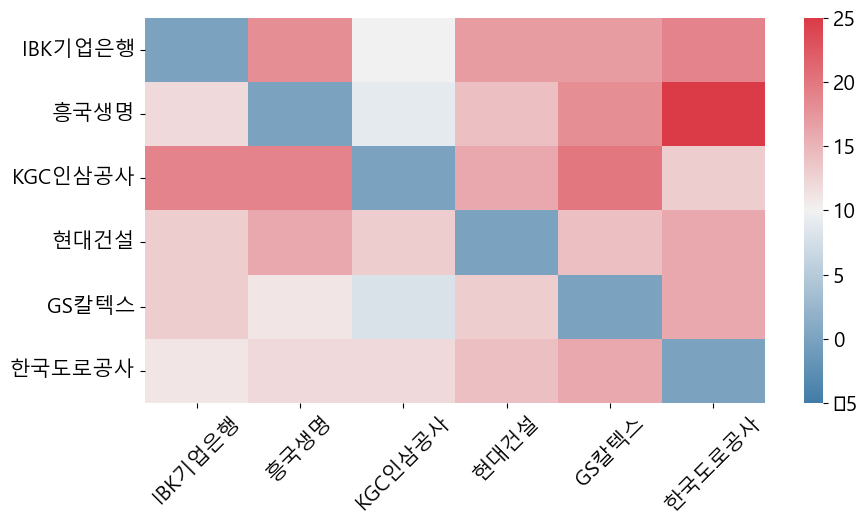

In [31]:
import seaborn as sns
data = 상대전적.drop(columns='페퍼저축은행',index='페퍼저축은행')
plt.figure(figsize=(10, 5))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data,cmap=cmap, vmin = -5)     # 최소값을 -1로 설정
plt.xticks(rotation=45)
plt.show()

In [32]:
# 데이터 복사본
data = 상대전적.copy()
data.drop(columns='페퍼저축은행',index='페퍼저축은행', inplace=True)
data = data.T.reset_index()

# 거리계산을 위해 정규화 전처리 진행
from sklearn.preprocessing import MinMaxScaler
data[['IBK기업은행', '흥국생명', 'KGC인삼공사', '현대건설', 'GS칼텍스', '한국도로공사']] = MinMaxScaler().fit_transform(
    data[['IBK기업은행', '흥국생명', 'KGC인삼공사', '현대건설', 'GS칼텍스', '한국도로공사']]
)
data

,index,IBK기업은행,흥국생명,KGC인삼공사,현대건설,GS칼텍스,한국도로공사
0,IBK기업은행,0.000000,0.48,0.95,0.8125,0.8125,0.6875
1,흥국생명,0.947368,0.00,0.95,1.0000,0.6875,0.7500
2,KGC인삼공사,0.526316,0.36,0.00,0.8125,0.5000,0.7500
3,현대건설,0.894737,0.56,0.80,0.0000,0.8125,0.8750
4,GS칼텍스,0.894737,0.72,1.00,0.8750,0.0000,1.0000
5,한국도로공사,1.000000,1.00,0.65,1.0000,1.0000,0.0000


In [33]:
import matplotlib.pyplot as plt

# 군집분석
from sklearn.cluster import KMeans
# 여러가지 군집 갯수를 테스트
plt.figure(figsize=(15,15))
team = ['흥국생명', 'KGC인삼공사', '현대건설', 'GS칼텍스', '한국도로공사']
for k in range(2,6):

    model = KMeans(n_clusters = k)
    pred = model.fit_predict(data[[i]])
    plt.subplot(2,3,k-1)
    plt.title(f'K={k}')
    plt.xlabel('IBK기업은행')
    plt.ylabel('흥국생명')
    plt.scatter( 
        data['IBK기업은행'], 
        data['흥국생명'],
        c = pred # color : 같은 값끼리 같은 색을 가짐
    ) 

KeyError: "None of [Index(['페퍼저축은행'], dtype='object')] are in the [columns]"

<Figure size 1500x1500 with 0 Axes>

## 1차 학습

In [34]:
# df4에 상대전적 비율 추가
import numpy as np

for i in 팀:
    team = np.delete(팀, np.where((팀 == i))
    for j in team:
        df2.loc[df2['팀명']==i and df2['상대팀']==j]['상대전적'] = 상대전적[i][j]

df2

SyntaxError: Generator expression must be parenthesized (4208692833.py, line 5)

In [35]:
# X, Y 선택
features = ['디그_성공률','세트_성공률','리시브_정확도','블로킹_성공률','원정승','원정패','홈승','홈패','홈_어웨이']

X = df2[features]
y = df2['결과']

In [36]:
# 학습, 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_train, y_train), lg.score(X_test, y_test)

(0.7918424753867792, 0.7932489451476793)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train), lg.score(X_test, y_test)

(0.8481012658227848, 0.7932489451476793)